In [2]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importing Datasets

# Q1 List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold. 

In [3]:
df_date = pd.read_csv("../datasets/dim_date.csv")
df_date.head()
df_maker = pd.read_csv("../datasets/electric_vehicle_sales_by_makers.csv")
df_maker.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [4]:
df_date["date"] = pd.to_datetime(df_date["date"], format = "%d-%b-%y")
df_date

,date,fiscal_year,quarter
0,2021-04-01,2022,Q1
1,2021-05-01,2022,Q1
2,2021-06-01,2022,Q1
3,2021-07-01,2022,Q2
4,2021-08-01,2022,Q2
5,2021-09-01,2022,Q2
6,2021-10-01,2022,Q3
7,2021-11-01,2022,Q3
8,2021-12-01,2022,Q3
9,2022-01-01,2022,Q4


In [5]:
df_maker["date"] = pd.to_datetime(df_maker["date"], format = "%d-%b-%y")
df_maker

,date,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2-Wheelers,OLA ELECTRIC,0
1,2022-04-01,2-Wheelers,OKAYA EV,0
2,2021-05-01,2-Wheelers,OLA ELECTRIC,0
3,2021-06-01,2-Wheelers,OLA ELECTRIC,0
4,2021-07-01,2-Wheelers,OLA ELECTRIC,0
...,...,...,...,...
811,2024-03-01,2-Wheelers,BGAUSS,3070
812,2024-03-01,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2-Wheelers,REVOLT,585


In [6]:
sales_df = df_date.merge(df_maker, on="date", how="left")   # sales_df is the resulting DataFrame obtained by merging df_date and df_maker
sales_df

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585


In [7]:
sales_df = sales_df[sales_df["vehicle_category"] == "2-Wheelers"]     # Filetering 2-Wheelers
sales_df

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
11,2021-04-01,2022,Q1,2-Wheelers,HERO ELECTRIC,759
12,2021-04-01,2022,Q1,2-Wheelers,OKINAWA,1251
13,2021-04-01,2022,Q1,2-Wheelers,AMPERE,751
14,2021-04-01,2022,Q1,2-Wheelers,ATHER,903
...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585


In [8]:
sales_df = sales_df[sales_df["fiscal_year"].isin([2023,2024])]           #Filtering 2023 and 2024 data
sales_df

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
264,2022-04-01,2023,Q1,2-Wheelers,OKAYA EV,0
275,2022-04-01,2023,Q1,2-Wheelers,OLA ELECTRIC,13601
276,2022-04-01,2023,Q1,2-Wheelers,OKINAWA,11341
277,2022-04-01,2023,Q1,2-Wheelers,HERO ELECTRIC,6803
278,2022-04-01,2023,Q1,2-Wheelers,AMPERE,6864
...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585


In [9]:
sales_summary = sales_df.groupby(["fiscal_year", "maker"])["electric_vehicles_sold"].sum().reset_index()
sales_summary  # sales_summary contains the sales_df data grouped by fiscal_year and maker

,fiscal_year,maker,electric_vehicles_sold
0,2023,AMPERE,87376
1,2023,ATHER,76921
2,2023,BAJAJ,32797
3,2023,BEING,11018
4,2023,HERO ELECTRIC,88993
5,2023,JITENDRA,8563
6,2023,OKAYA EV,13172
7,2023,OKINAWA,96945
8,2023,OLA ELECTRIC,152583
9,2023,OTHERS,52953


# Top3 2-Wheeler Makers for the Year 2023 and 2024

In [11]:
top_makers = sales_summary.sort_values(by=["fiscal_year","electric_vehicles_sold"], ascending=[False,False]).groupby("fiscal_year").head(3)
top_makers

,fiscal_year,maker,electric_vehicles_sold
22,2024,OLA ELECTRIC,322489
25,2024,TVS,180743
14,2024,ATHER,107552
8,2023,OLA ELECTRIC,152583
7,2023,OKINAWA,96945
4,2023,HERO ELECTRIC,88993


In [20]:
top_makers = sales_summary.groupby("fiscal_year").apply(lambda x: x.sort_values(by="electric_vehicles_sold", ascending=False).head(3).reset_index())
top_makers

C:\Users\thoma\AppData\Local\Temp\ipykernel_44624\3740737208.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_makers = sales_summary.groupby("fiscal_year").apply(lambda x: x.sort_values(by="electric_vehicles_sold", ascending=False).head(3).reset_index())


index  fiscal_year          maker  electric_vehicles_sold
fiscal_year                                                             
2023        0      8         2023   OLA ELECTRIC                  152583
            1      7         2023        OKINAWA                   96945
            2      4         2023  HERO ELECTRIC                   88993
2024        0     22         2024   OLA ELECTRIC                  322489
            1     25         2024            TVS                  180743
            2     14         2024          ATHER                  107552

# Bottom3 2-Wheeler Makers for the Year 2023 and 2024

In [18]:
bottom_makers = sales_summary.sort_values(by="electric_vehicles_sold", ascending=True).groupby("fiscal_year").head(3)
bottom_makers

,fiscal_year,maker,electric_vehicles_sold
16,2024,BATTRE ELECTRIC,4841
24,2024,REVOLT,7254
5,2023,JITENDRA,8563
19,2024,KINETIC GREEN,9585
3,2023,BEING,11018
10,2023,PURE EV,11556


In [21]:
bottom_makers = sales_summary.groupby("fiscal_year").apply(lambda x: x.sort_values(by="electric_vehicles_sold", ascending=True).head(3).reset_index())
bottom_makers

C:\Users\thoma\AppData\Local\Temp\ipykernel_44624\420643522.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_makers = sales_summary.groupby("fiscal_year").apply(lambda x: x.sort_values(by="electric_vehicles_sold", ascending=True).head(3).reset_index())


index  fiscal_year            maker  electric_vehicles_sold
fiscal_year                                                               
2023        0      5         2023         JITENDRA                    8563
            1      3         2023            BEING                   11018
            2     10         2023          PURE EV                   11556
2024        0     16         2024  BATTRE ELECTRIC                    4841
            1     24         2024           REVOLT                    7254
            2     19         2024    KINETIC GREEN                    9585

In [15]:
top_bottom_makers = sales_summary.groupby("fiscal_year").apply(
    lambda x: pd.concat([x.nlargest(3, "electric_vehicles_sold"), x.nsmallest(3, "electric_vehicles_sold")])
).reset_index(drop=True)
top_bottom_makers

C:\Users\thoma\AppData\Local\Temp\ipykernel_44624\4130949158.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_bottom_makers = sales_summary.groupby("fiscal_year").apply(


,fiscal_year,maker,electric_vehicles_sold
0,2023,OLA ELECTRIC,152583
1,2023,OKINAWA,96945
2,2023,HERO ELECTRIC,88993
3,2023,JITENDRA,8563
4,2023,BEING,11018
5,2023,PURE EV,11556
6,2024,OLA ELECTRIC,322489
7,2024,TVS,180743
8,2024,ATHER,107552
9,2024,BATTRE ELECTRIC,4841


# Q2 Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024. 

In [12]:
df_state = pd.read_csv("../datasets/electric_vehicle_sales_by_state.csv")
df_state.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [13]:
df_state["penetration_rate"] = (df_state["electric_vehicles_sold"]/df_state["total_vehicles_sold"])*100
df_state.tail()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932,3.002070
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780,3.205128
2442,01-Mar-24,Manipur,2-Wheelers,13,1394,0.932568
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447,0.447427
2444,01-Mar-24,Nagaland,2-Wheelers,2,1180,0.169492


In [14]:
df_state["date"] = pd.to_datetime(df_state["date"], format="%d-%b-%y")
df_state

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
0,2021-04-01,Sikkim,2-Wheelers,0,398,0.000000
1,2021-04-01,Sikkim,4-Wheelers,0,361,0.000000
2,2021-05-01,Sikkim,2-Wheelers,0,113,0.000000
3,2021-05-01,Sikkim,4-Wheelers,0,98,0.000000
4,2021-06-01,Sikkim,2-Wheelers,0,229,0.000000
...,...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932,3.002070
2441,2024-03-01,DNH and DD,2-Wheelers,25,780,3.205128
2442,2024-03-01,Manipur,2-Wheelers,13,1394,0.932568
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447,0.447427


In [15]:
df_state_24 = df_state[df_state["date"].dt.year == 2024]
df_state_24

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
66,2024-01-01,Sikkim,2-Wheelers,0,509,0.000000
67,2024-01-01,Sikkim,4-Wheelers,0,422,0.000000
68,2024-02-01,Sikkim,2-Wheelers,0,408,0.000000
69,2024-02-01,Sikkim,4-Wheelers,0,375,0.000000
70,2024-03-01,Sikkim,2-Wheelers,0,399,0.000000
...,...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932,3.002070
2441,2024-03-01,DNH and DD,2-Wheelers,25,780,3.205128
2442,2024-03-01,Manipur,2-Wheelers,13,1394,0.932568
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447,0.447427


# Top5 states with the highest penetration rate in 2-Wheelers and 4-Wheelers

In [18]:
highest_penetration = df_state_24.groupby("vehicle_category").apply( lambda x: x.sort_values(by="penetration_rate", ascending=False).head().reset_index())
highest_penetration

C:\Users\thoma\AppData\Local\Temp\ipykernel_2764\3931934109.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  highest_penetration = df_state_24.groupby("vehicle_category").apply( lambda x: x.sort_values(by="penetration_rate", ascending=False).head().reset_index())


index       date       state vehicle_category  \
vehicle_category                                                    
2-Wheelers       0   2383 2024-01-01      Ladakh       2-Wheelers   
                 1   2432 2024-03-01         Goa       2-Wheelers   
                 2   2405 2024-02-01         Goa       2-Wheelers   
                 3   2421 2024-03-01      Kerala       2-Wheelers   
                 4   2417 2024-03-01   Karnataka       2-Wheelers   
4-Wheelers       0   1368 2024-01-01      Kerala       4-Wheelers   
                 1   1441 2024-03-01  Chandigarh       4-Wheelers   
                 2   1437 2024-03-01         Goa       4-Wheelers   
                 3   1413 2024-02-01  Chandigarh       4-Wheelers   
                 4   1426 2024-03-01      Kerala       4-Wheelers   

                    electric_vehicles_sold  total_vehicles_sold  \
vehicle_category                                                  
2-Wheelers       0                      14                   37   
                 1                    1745                 5018   
                 2                     990                 4759   
                 3                    8393                42909   
                 4                   22742               123800   
4-Wheelers       0                     734                  164   
                 1                     119                 1294   
                 2                     123                 1730   
                 3                      84                 1321   
                 4                     876                13861   

                    penetration_rate  
vehicle_category                      
2-Wheelers       0         37.837838  
                 1         34.774811  
                 2         20.802690  
                 3         19.559999  
                 4         18.369952  
4-Wheelers       0        447.560976  
                 1          9.196291  
                 2          7.109827  
                 3          6.358819  
                 4          6.319890

# Q3 List the states with negative penetration (decline) in EV sales from 2022 to 2024? 

In [19]:
negative_penetration = df_state[df_state["penetration_rate"]<0]
negative_penetration

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate


# Q4  What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?

In [20]:
date_maker = df_date.merge(df_maker, on="date", how="left")
date_maker

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585


In [21]:
date_maker_4wheeler = date_maker[date_maker["vehicle_category"]=="4-Wheelers"]
date_maker_4wheeler

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
5,2021-04-01,2022,Q1,4-Wheelers,KIA Motors,0
...,...,...,...,...,...,...
798,2024-03-01,2024,Q4,4-Wheelers,PCA Automobiles,130
799,2024-03-01,2024,Q4,4-Wheelers,BMW India,55
800,2024-03-01,2024,Q4,4-Wheelers,Mercedes -Benz AG,31
801,2024-03-01,2024,Q4,4-Wheelers,Volvo Auto India,39


In [22]:
total_4wheeler_sales_quarter = (date_maker_4wheeler.groupby(["fiscal_year","quarter", "maker"])["electric_vehicles_sold"].sum().reset_index().sort_values(["fiscal_year","quarter", "electric_vehicles_sold"], ascending=[True,True, False]))
total_4wheeler_sales_quarter

,fiscal_year,quarter,maker,electric_vehicles_sold
8,2022,Q1,Tata Motors,1031
5,2022,Q1,Mahindra & Mahindra,355
4,2022,Q1,MG Motor,285
2,2022,Q1,Hyundai Motor,25
6,2022,Q1,Mercedes -Benz AG,5
...,...,...,...,...
110,2024,Q4,BMW India,268
117,2024,Q4,PCA Automobiles,217
119,2024,Q4,Volvo Auto India,116
116,2024,Q4,Mercedes -Benz AG,84


In [24]:
total_4wheeler_sales_quarter = total_4wheeler_sales_quarter.groupby(["fiscal_year","quarter"]).head()
total_4wheeler_sales_quarter   # These are the top5 EV makers(4-Wheelers) from 2022 to 2024 for each quarter

,fiscal_year,quarter,maker,electric_vehicles_sold
8,2022,Q1,Tata Motors,1031
5,2022,Q1,Mahindra & Mahindra,355
4,2022,Q1,MG Motor,285
2,2022,Q1,Hyundai Motor,25
6,2022,Q1,Mercedes -Benz AG,5
18,2022,Q2,Tata Motors,2052
14,2022,Q2,MG Motor,798
15,2022,Q2,Mahindra & Mahindra,651
12,2022,Q2,Hyundai Motor,34
16,2022,Q2,Mercedes -Benz AG,5


In [46]:
top5_evmaker = date_maker_4wheeler.groupby("maker")["electric_vehicles_sold"].sum().reset_index().sort_values("electric_vehicles_sold", ascending=False)
top5_evmaker = top5_evmaker.head()
top5_evmaker

,maker,electric_vehicles_sold
8,Tata Motors,88935
5,Mahindra & Mahindra,41193
4,MG Motor,13753
1,BYD India,2419
2,Hyundai Motor,2076


In [47]:
top5_evmaker = pd.merge(top5_evmaker,date_maker_4wheeler, on="maker", how="inner")
top5_evmaker

,maker,electric_vehicles_sold_x,date,fiscal_year,quarter,vehicle_category,electric_vehicles_sold_y
0,Tata Motors,88935,2021-04-01,2022,Q1,4-Wheelers,322
1,Tata Motors,88935,2021-05-01,2022,Q1,4-Wheelers,137
2,Tata Motors,88935,2021-06-01,2022,Q1,4-Wheelers,572
3,Tata Motors,88935,2021-07-01,2022,Q2,4-Wheelers,696
4,Tata Motors,88935,2021-08-01,2022,Q2,4-Wheelers,584
...,...,...,...,...,...,...,...
175,Hyundai Motor,2076,2023-11-01,2024,Q3,4-Wheelers,125
176,Hyundai Motor,2076,2023-12-01,2024,Q3,4-Wheelers,97
177,Hyundai Motor,2076,2024-01-01,2024,Q4,4-Wheelers,128
178,Hyundai Motor,2076,2024-02-01,2024,Q4,4-Wheelers,94


In [50]:
top5_evmaker = top5_evmaker.drop(columns="electric_vehicles_sold_x")
top5_evmaker

,maker,date,fiscal_year,quarter,vehicle_category,electric_vehicles_sold_y
0,Tata Motors,2021-04-01,2022,Q1,4-Wheelers,322
1,Tata Motors,2021-05-01,2022,Q1,4-Wheelers,137
2,Tata Motors,2021-06-01,2022,Q1,4-Wheelers,572
3,Tata Motors,2021-07-01,2022,Q2,4-Wheelers,696
4,Tata Motors,2021-08-01,2022,Q2,4-Wheelers,584
...,...,...,...,...,...,...
175,Hyundai Motor,2023-11-01,2024,Q3,4-Wheelers,125
176,Hyundai Motor,2023-12-01,2024,Q3,4-Wheelers,97
177,Hyundai Motor,2024-01-01,2024,Q4,4-Wheelers,128
178,Hyundai Motor,2024-02-01,2024,Q4,4-Wheelers,94


In [53]:
top5_evmaker = top5_evmaker.rename(columns={"electric_vehicles_sold_y":"electric_vehicles_sold"})
top5_evmaker

,maker,date,fiscal_year,quarter,vehicle_category,electric_vehicles_sold
0,Tata Motors,2021-04-01,2022,Q1,4-Wheelers,322
1,Tata Motors,2021-05-01,2022,Q1,4-Wheelers,137
2,Tata Motors,2021-06-01,2022,Q1,4-Wheelers,572
3,Tata Motors,2021-07-01,2022,Q2,4-Wheelers,696
4,Tata Motors,2021-08-01,2022,Q2,4-Wheelers,584
...,...,...,...,...,...,...
175,Hyundai Motor,2023-11-01,2024,Q3,4-Wheelers,125
176,Hyundai Motor,2023-12-01,2024,Q3,4-Wheelers,97
177,Hyundai Motor,2024-01-01,2024,Q4,4-Wheelers,128
178,Hyundai Motor,2024-02-01,2024,Q4,4-Wheelers,94


In [54]:
top5_evmaker = top5_evmaker.groupby(["fiscal_year","quarter","maker"])["electric_vehicles_sold"].sum().reset_index()
top5_evmaker

,fiscal_year,quarter,maker,electric_vehicles_sold
0,2022,Q1,BYD India,0
1,2022,Q1,Hyundai Motor,25
2,2022,Q1,MG Motor,285
3,2022,Q1,Mahindra & Mahindra,355
4,2022,Q1,Tata Motors,1031
5,2022,Q2,BYD India,0
6,2022,Q2,Hyundai Motor,34
7,2022,Q2,MG Motor,798
8,2022,Q2,Mahindra & Mahindra,651
9,2022,Q2,Tata Motors,2052


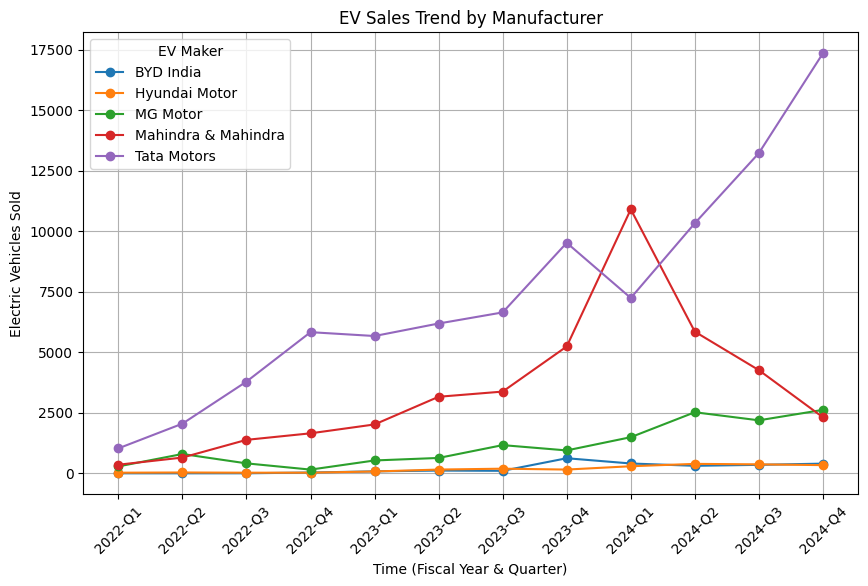

In [55]:
top5_evmaker["time"] = top5_evmaker["fiscal_year"].astype(str) + "-" + top5_evmaker["quarter"]

# Sort values by time for proper plotting
top5_evmaker = top5_evmaker.sort_values(by="time")

# Pivot the DataFrame to get makers as separate columns
df_pivot = top5_evmaker.pivot(index="time", columns="maker", values="electric_vehicles_sold")

# Plot the line graph
plt.figure(figsize=(10, 6))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], marker="o", linestyle="-", label=column)

# Formatting
plt.xlabel("Time (Fiscal Year & Quarter)")
plt.ylabel("Electric Vehicles Sold")
plt.title("EV Sales Trend by Manufacturer")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="EV Maker")
plt.grid(True)

# Show plot
plt.show()

# Q5 How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?

In [25]:
df_state_24

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
66,2024-01-01,Sikkim,2-Wheelers,0,509,0.000000
67,2024-01-01,Sikkim,4-Wheelers,0,422,0.000000
68,2024-02-01,Sikkim,2-Wheelers,0,408,0.000000
69,2024-02-01,Sikkim,4-Wheelers,0,375,0.000000
70,2024-03-01,Sikkim,2-Wheelers,0,399,0.000000
...,...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932,3.002070
2441,2024-03-01,DNH and DD,2-Wheelers,25,780,3.205128
2442,2024-03-01,Manipur,2-Wheelers,13,1394,0.932568
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447,0.447427


In [26]:
df_state_24_del_kar = df_state_24[df_state_24["state"].isin(["Delhi","Karnataka"])]
df_state_24_del_kar

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,penetration_rate
1365,2024-01-01,Karnataka,4-Wheelers,1080,30770,3.509912
1370,2024-01-01,Delhi,4-Wheelers,1345,21520,6.250000
1393,2024-02-01,Karnataka,4-Wheelers,923,24812,3.719974
1400,2024-02-01,Delhi,4-Wheelers,596,17898,3.329981
1422,2024-03-01,Karnataka,4-Wheelers,1482,26751,5.539980
1425,2024-03-01,Delhi,4-Wheelers,897,15905,5.639736
2356,2024-01-01,Karnataka,2-Wheelers,12415,115920,10.709972
2361,2024-01-01,Delhi,2-Wheelers,3073,38413,7.999896
2387,2024-02-01,Karnataka,2-Wheelers,12605,108852,11.579943
2394,2024-02-01,Delhi,2-Wheelers,2364,30504,7.749803


In [27]:
total_evsales_del_24 = df_state_24_del_kar[df_state_24_del_kar["state"] == "Delhi"]["electric_vehicles_sold"].sum()
total_sales_del_24 = df_state_24_del_kar[df_state_24_del_kar["state"] == "Delhi"]["total_vehicles_sold"].sum()
total_evsales_kar_24 = df_state_24_del_kar[df_state_24_del_kar["state"] == "Karnataka"]["electric_vehicles_sold"].sum()
total_sales_kar_24 = df_state_24_del_kar[df_state_24_del_kar["state"] == "Karnataka"]["total_vehicles_sold"].sum()

In [36]:
total_evsales_del_24

13277

In [37]:
total_evsales_kar_24

51247

In [38]:
penetration_rate_del = (total_evsales_del_24/total_sales_del_24)*100
penetration_rate_del

8.519690193083889

In [39]:
penetration_rate_kar = (total_evsales_kar_24/total_sales_kar_24)*100
penetration_rate_kar

11.892876620136688

In [40]:
avg_sales_delhi = df_state_24_del_kar[df_state_24_del_kar["state"] == "Delhi"]["electric_vehicles_sold"].mean()
avg_sales_karnataka = df_state_24_del_kar[df_state_24_del_kar["state"] == "Karnataka"]["electric_vehicles_sold"].mean()
avg_sales_delhi

2212.8333333333335

In [41]:
avg_sales_karnataka

8541.166666666666

In [42]:
avg_penetration_delhi = (df_state_24_del_kar[df_state_24_del_kar["state"] == "Delhi"]["penetration_rate"].mean())
avg_penetration_karnataka = (df_state_24_del_kar[df_state_24_del_kar["state"] == "Karnataka"]["penetration_rate"].mean())
avg_penetration_delhi

7.799838494976917

In [43]:
avg_penetration_karnataka

8.904955601825023

# The EV sales for karnataka as comapred to Delhi is approximately 4 times higher and penetration rate is at 11.89%

In [91]:
total_4wheeler_yearly_sales = (
    date_maker_4wheeler.groupby(["fiscal_year", "maker"])["electric_vehicles_sold"]
    .sum()
    .reset_index()
    .sort_values(["fiscal_year", "electric_vehicles_sold"], ascending=[True, False])
)
total_4wheeler_yearly_sales

,fiscal_year,maker,electric_vehicles_sold
8,2022,Tata Motors,12708
5,2022,Mahindra & Mahindra,4042
4,2022,MG Motor,1647
2,2022,Hyundai Motor,110
1,2022,BYD India,33
6,2022,Mercedes -Benz AG,26
0,2022,BMW India,7
9,2022,Volvo Auto India,4
3,2022,KIA Motors,0
7,2022,PCA Automobiles,0


In [92]:
total_4wheeler_yearly_sales = total_4wheeler_yearly_sales.groupby("fiscal_year").head()
total_4wheeler_yearly_sales

,fiscal_year,maker,electric_vehicles_sold
8,2022,Tata Motors,12708
5,2022,Mahindra & Mahindra,4042
4,2022,MG Motor,1647
2,2022,Hyundai Motor,110
1,2022,BYD India,33
18,2023,Tata Motors,28046
15,2023,Mahindra & Mahindra,13805
14,2023,MG Motor,3277
11,2023,BYD India,920
12,2023,Hyundai Motor,576


In [104]:
hyun_sales_2024 = total_4wheeler_yearly_sales[(total_4wheeler_yearly_sales["maker"]=="Hyundai Motor") & (total_4wheeler_yearly_sales["fiscal_year"]==2024)]
hyun_sales_2024

,fiscal_year,maker,electric_vehicles_sold
